In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_hf = pd.read_csv('Heart Failure Prediction.csv')
df_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df_mp = pd.read_csv('Dataset_Metaprotein.csv')
df_mp.head()

,Metaprotein,Superkingdom,Kingdom,Phylum,Class,Order,Family,Genus,Species,UniRef50,...,P33_UC,P34_UC,P35_UC,P36_UC,P37_UC,P38_UC,P39_UC,P40_UC,P41_UC,P42_UC
0,11S2_SESIN 11S globulin seed storage protein 2...,Eukaryota,Viridiplantae,Streptophyta,unassigned,Lamiales,Pedaliaceae,Sesamum,Sesamum indicum,UniRef50_Q9XHP0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11S3_HELAN 11S globulin seed storage protein G...,Eukaryota,Viridiplantae,Streptophyta,unassigned,Asterales,Asteraceae,Helianthus,Helianthus annuus,UniRef50_P19084,...,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,11SB_CUCMA 11S globulin subunit beta OS=Cucurb...,Eukaryota,Viridiplantae,Streptophyta,unassigned,Cucurbitales,Cucurbitaceae,Cucurbita,Cucurbita maxima,UniRef50_P13744,...,28.0,1111.0,25.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0
3,12S_PROFR Methylmalonyl-CoA carboxyltransferas...,Bacteria,unassigned,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,Propionibacterium freudenreichii,UniRef50_Q8GBW6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433_CHLRE 14-3-3-like protein OS=Chlamydomona...,Eukaryota,Viridiplantae,Chlorophyta,Chlorophyceae,Chlamydomonadales,Chlamydomonadaceae,Chlamydomonas,Chlamydomonas reinhardtii,UniRef50_Q9S9Z8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_fc = pd.read_csv('Flu_Classification.csv')
df_fc.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [5]:
df_diabetes = pd.read_csv('diabetes_health_indicators.csv')
df_diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
df_k = PCA(2).fit_transform(df)

In [15]:
kmeans = KMeans(n_clusters=3).fit(df_k)
label = kmeans.fit_predict(df_k)

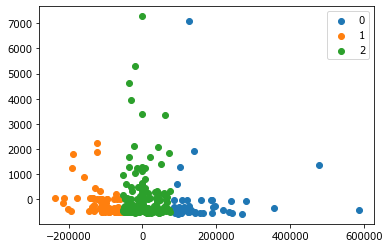

In [16]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df_k[label == i , 0] , df_k[label == i , 1] , label = i)
plt.legend()
plt.show()

In [19]:
dbclust = DBSCAN(eps = 0.9, min_samples = 5).fit(df_k)